This notebook is inspired by a much more complete notebook provided by Rui Henriques (thank you!).

All the mistakes are on me (Luísa).

# 1. Enriching the Dataset

## 1.1 Imports

In [1]:
# What do we need:
# - pandas for data handling
# - numpy for numerical computing
# - matplotlib.pyplot for plotting
# - scipy (built on top of numpy) provides specialized scientific algorithms
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import scipy

## 1.2 Read data

Let us use a dataset on fragrance reviews sold by Amazon, adapted some years ago for the NL project

In [3]:
df = pd.read_csv("/content/sample_data/P2_dataset_reviews.csv", delimiter=';', names=['eval','review'])
df.head()

,eval,review
0,VeryGood,Stamp and Scrape
1,Unsatisfactory,Did not even tingle for ant aging effect
2,VeryGood,"Well, I like it"
3,Excellent,Much better than what I was using.
4,Unsatisfactory,Disappointed with Usage and Dosage


In [4]:
df.shape # lines vs. columns

(10000, 2)

## 1.3 Enriching the dataset with the number of characters and words per review

In [5]:
df["#chars"] = df['review'].apply(len)
df['#words'] = df['review'].apply(lambda x: len(x.split()))

## 1.4 Enriching the dataset with the sentiment (polarity) of each review

In [6]:
# Textblob is a Python toolkit for processing and analyzing text
from textblob import TextBlob

# from Good to 3 (and so on)
df['rate'] = df['eval'].apply(lambda x: 1 if x == 'Poor' else (2 if x == 'Unsatisfactory' else (3 if x == 'Good' else (4 if x == 'VeryGood' else 5))))

# Sentiment Analysis
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity) # between -1 and 1

# Transforming the sentiment score into categories: negative, neutral and positive
df['sign'] = df['polarity'].apply(lambda x: 'negative' if x < 0 else ('neutral' if x == 0 else 'positive'))

## 1.5 What we have now...

In [7]:
df.head()
print(df[:20])

              eval                                    review  #chars  #words  \
0         VeryGood                          Stamp and Scrape      16       3   
1   Unsatisfactory  Did not even tingle for ant aging effect      40       8   
2         VeryGood                           Well, I like it      15       4   
3        Excellent        Much better than what I was using.      34       7   
4   Unsatisfactory        Disappointed with Usage and Dosage      34       5   
5             Poor                               Don't work?      11       2   
6         VeryGood             Good product in a weird niche      29       6   
7        Excellent      Staple Scent for Active Males...imho      36       5   
8         VeryGood                         Pure rose essence      17       3   
9         VeryGood                              Good product      12       2   
10        VeryGood                                      soft       4       1   
11        VeryGood      40 Carrots Moist

Let us guarantee that the codified type of variables is correct...

In [8]:
df['review'] = df['review'].astype('string')
df[['sign']] = df[['sign']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   eval      10000 non-null  object  
 1   review    10000 non-null  string  
 2   #chars    10000 non-null  int64   
 3   #words    10000 non-null  int64   
 4   rate      10000 non-null  int64   
 5   polarity  10000 non-null  float64 
 6   sign      10000 non-null  category
dtypes: category(1), float64(1), int64(3), object(1), string(1)
memory usage: 478.8+ KB


## Before we move on

Remember that variables can be of different types:

1. **Numeric (Quantitative)**: variables that take numbers and can be used in arithmetic. Examples: height, weight, temperature, rate.
They have two subtypes:<br>

     1.1 **Continuous**: can take any value in a range (e.g., 1.5, 2.3, 3.0)<br>
     1.2 **Discrete**: take only specific integer values (e.g., number of children)

2. **Ordinal**: categorical variables with a meaningful order, but the differences between levels are not necessarily uniform. You can rank them, but you cannot reliably do arithmetic on them. Examples: ratings like "Poor" < "Good" < "Very Good".

3. **Nominal**: categorical variables that represent categories without any inherent order. You can count occurrences but cannot rank or do arithmetic.  Examples: color (red, blue, green), gender (male, female), product type.

**Exercise: Examine the variables in the dataset and determine the type of each.**

# 2. Studying the dataset

## 2.1 Checking some basic statistics

We will check:
- centrality (such as mean and mode)
- variability (such as standard deviation and entropy)
- percentile statistics


In [9]:
# controls the number of decimal places shown in pandas output
pd.options.display.float_format = "{:.2f}".format

# Generates summary statistics only for numeric columns (type int64 and float64)
# - how many rows there are (count)
# - their average (mean)
# - spread (std)
# - distribution range (min, quartiles, max)
df.describe(include=['int64','float64'])


,#chars,#words,rate,polarity
count,10000.00,10000.00,10000.00,10000.00
mean,23.09,4.23,2.99,0.17
std,15.60,2.84,1.41,0.41
min,1.00,1.00,1.00,-1.00
25%,12.00,2.00,2.00,0.00
50%,19.00,4.00,3.00,0.00
75%,30.00,6.00,4.00,0.50
max,128.00,25.00,5.00,1.00


In [10]:
df.describe(include='all') # Interesting. Analyse these results
# Text-like columns get frequency info, while numeric ones get statistical measures, so:
# - as chars, #words, rate, and polarity are numeric, will you see mean, std, etc.
# - as eval, review, and sign are categorical, you will see:
# a) counts,
# b) number of unique values,
# c) most frequent value (top) and its frequency (freq).


,eval,review,#chars,#words,rate,polarity,sign
count,10000,10000,10000.00,10000.00,10000.00,10000.00,10000
unique,5,8608,NaN,NaN,NaN,NaN,3
top,Good,Not for me,NaN,NaN,NaN,NaN,positive
freq,2025,51,NaN,NaN,NaN,NaN,4464
mean,NaN,NaN,23.09,4.23,2.99,0.17,NaN
std,NaN,NaN,15.60,2.84,1.41,0.41,NaN
min,NaN,NaN,1.00,1.00,1.00,-1.00,NaN
25%,NaN,NaN,12.00,2.00,2.00,0.00,NaN
50%,NaN,NaN,19.00,4.00,3.00,0.00,NaN
75%,NaN,NaN,30.00,6.00,4.00,0.50,NaN


In [19]:
# You can also check the number of occurrences of each unique combinations.
# Example:
df[["rate",'sign']].value_counts()

,,count
rate,sign,
5,positive,1365
4,positive,1302
1,neutral,1014
3,positive,994
2,neutral,962
3,neutral,740
1,negative,727
4,neutral,553
5,neutral,545


**Exercise: Explain the empty cell**

## 2.2 Checking the distributions

There are two major options:

- empirical distributions given by relative frequencies
- theoretical distributions (e.g., binomial, uniform, poisson) <-- aproximations

We are only going to follow the empirical approach. However, first let us see how to find the uncertainty of a distribution.

### 2.2.1 Uncertainty of a distribution

In [12]:
# You can use the Shannon entropy to measure the uncertainty or
# unpredictability in a distribution (how diverse the values are in each column):
# - High entropy: values are more evenly distributed (less predictable).
# - Low entropy: one or few values dominate (more predictable).
# -- Minimum entropy = 0 (all values are the same)

print(round(scipy.stats.entropy(df['rate'].value_counts()), 2))

print(round(scipy.stats.entropy(df['sign'].value_counts()), 2))

1.61
1.03


**Exercise: Comment on the previous results**

### 2.2.2 Probability Distributions of Continuous Variables (or Probability Density Function)

We will use and histogram and KDE:

Histogram = "how many values fall in each bucket?"
KDE = "what does the smooth underlying distribution look like?"

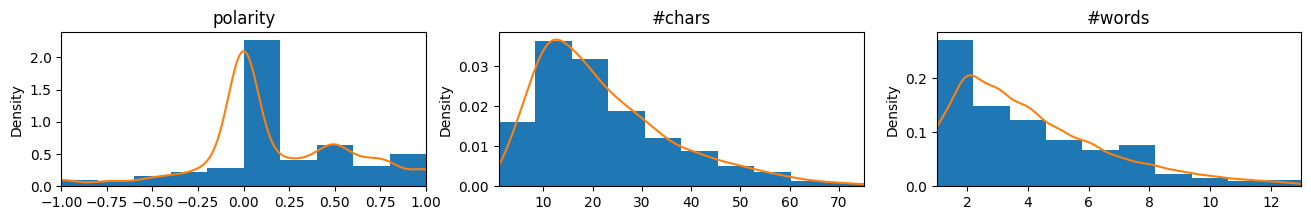

In [13]:
# 1, 3: 1 row and 3 columns of subplots
# figsize=(16, 2): sets the overall figure size: 16 inches wide and 2 inches tall.
# fig: the overall figure object that contains all subplots.
# ax: an array of the 3 axes objects, one for each subplot,
# which you can use individually to plot different data.

fig, ax = plt.subplots(1, 3, figsize=(16, 2))

for i, col in enumerate(['polarity', '#chars', '#words']):
   # plotting the relative histograms and smooth estimates using kernel density
   # estimation (KDE)
   # .plot.hist(...): creates a histogram.
   # bins=10: divides the data range into 10 intervals (bars).
   # density=True: normalizes the histogram so the area sums to 1
   # (y-axis shows probability density instead of raw counts).
   # ax=ax[i]: force to draw the plot on an existing axis
    values = df[df[col] < np.percentile(df[col],99)][col] if col.startswith("#") else df[col]

    values.plot.hist(bins=10, density=True, ax=ax[i])
    values.plot.kde(bw_method=0.2, ax=ax[i], xlim=(values.min(),values.max()), title=col)

# Note/remmember that:
# - density refers to the relative frequency of values per unit rather than the absolute count.
# In a regular histogram, the y-axis shows counts (how many times each bin occurs).
# In a density histogram (density=True in pandas/matplotlib), the y-axis is scaled so that the area under the histogram sums to 1.

**Exercise: Comment on the previous results**

### 2.2.3 Probability Distributions of Categorial Variables (or Probability Mass Function)

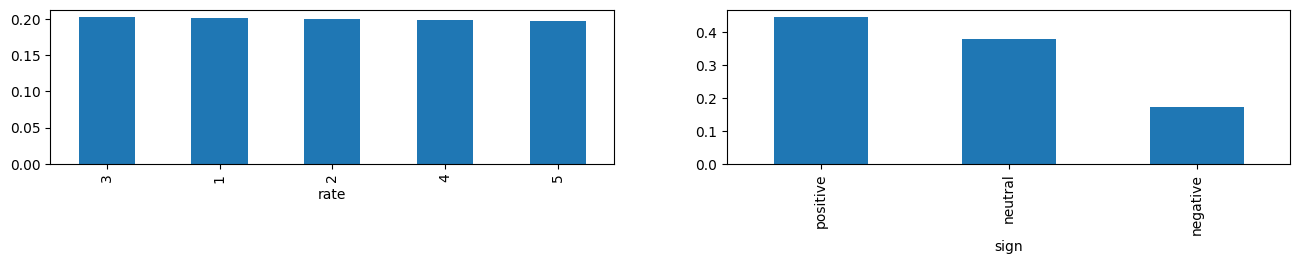

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,2))

# plotting the relative frequencies of the ordinal variables: tag and level
for i, col in enumerate(['rate','sign']):
    (df[col].value_counts()/df.shape[0]).plot(kind='bar',ax=ax[i])

**Exercise: Comment on the previous results**

# Before we move on

We are going to perform correlation tests, used when both variables are numeric or ordinal. They measure how strongly and in what direction the variables move together.

| Correlation     | Data type          | Detects                | Notes                                                                    |
| --------------- | ------------------ | ---------------------- | ------------------------------------------------------------------------ |
| **Pearson**     | Numeric            | Linear relationship    | Sensitive to outliers, requires roughly straight-line pattern            |
| **Spearman**    | Numeric or ordinal | Monotonic relationship | Can detect non-linear trends that are consistently increasing/decreasing |
| **Kendall tau** | Numeric or ordinal | Monotonic relationship | Measures concordance between ranks; robust to small samples and ties     |

The null hypothesis (H₀) of a correlation test is that there is no correlation
between variables (corr=0), hence low p-values (p≤α) attest the existence of an association.

Notice that:
1. High results of a correlation test (in absolute value) may not necessary ensure statistical significance

      1.1. Common in small samples!

      1.2. For instance, a correlation of 0.8 in a tiny dataset could be due to chance

2. Similarly, low results of a correlation test can be statistically significant

      2.1 For instance, a correlation of 0.2 in a very large dataset might be statistically reliable.

Thus: always access the p-value in addition to the coefficient.

Let us see some examples.

In [15]:
# Two examples not related with the reviews corpus
# - Non-linear example: y values grow in a non-linear way compared to the x values
# Example: from 10 to 1000 is a huge jump
# - Linear unordered example: x and y follow a linear pattern, but the points are unordered

cases = [('non-linear example',[0, 1, 2, 3, 4], [0, 1, 10, 1000, 1001]),
         ('linear unordered example',[0, 0.1, 2, 3, 3.1], [0.1, 0,2, 3.1, 3])]

In [16]:
import scipy.stats

def run_cases(cases):
  alpha = 0.05  # significance level

  for name, v1, v2 in cases:
    pearson = scipy.stats.pearsonr(v1, v2)
    spearman = scipy.stats.spearmanr(v1, v2)
    tau = scipy.stats.kendalltau(v1, v2)

    # coefficients
    print("\n\nCoefficients for the %s:" % name)
    print("  Pearson     = %.3f" % pearson[0])
    print("  Spearman    = %.3f" % spearman[0])
    print("  Kendall tau = %.3f" % tau[0])

    # p-values
    print("\nP-values (statistical significance) for the %s:" % name)
    print("  Pearson     = %.3f" % pearson[1])
    print("  Spearman    = %.3f" % spearman[1])
    print("  Kendall tau = %.3f" % tau[1])

    # hypothesis test results
    print("\nHypothesis test results (H0: no correlation, corr = 0):")
    print("  Pearson     → %s" % ("Reject H0" if pearson[1] <= alpha else "Fail to reject H0"))
    print("  Spearman    → %s" % ("Reject H0" if spearman[1] <= alpha else "Fail to reject H0"))
    print("  Kendall tau → %s" % ("Reject H0" if tau[1] <= alpha else "Fail to reject H0"))

In [17]:
run_cases(cases)



Coefficients for the non-linear example:
  Pearson     = 0.869
  Spearman    = 1.000
  Kendall tau = 1.000

P-values (statistical significance) for the non-linear example:
  Pearson     = 0.056
  Spearman    = 0.000
  Kendall tau = 0.017

Hypothesis test results (H0: no correlation, corr = 0):
  Pearson     → Fail to reject H0
  Spearman    → Reject H0
  Kendall tau → Reject H0


Coefficients for the linear unordered example:
  Pearson     = 0.998
  Spearman    = 0.800
  Kendall tau = 0.600

P-values (statistical significance) for the linear unordered example:
  Pearson     = 0.000
  Spearman    = 0.104
  Kendall tau = 0.233

Hypothesis test results (H0: no correlation, corr = 0):
  Pearson     → Reject H0
  Spearman    → Fail to reject H0
  Kendall tau → Fail to reject H0


**Exercise: Comment on the previous results**

- There is evidence of a linear correlation (Pearson), but it may not be a strong monotonic relationship, or the sample may be small/noisy, as rank-based correlation (Spearman/Kendall) doesn't confirm a robust monotonic trend.

# 3. Checking the relationship between the review rating and the review polarity

In [18]:
#r, p = spearmanr(df['polarity'], df['rate']) #, nan_policy='omit')
cases = [('polarity_vs_rate', df['polarity'], df['rate'])]
run_cases(cases)



Coefficients for the polarity_vs_rate:
  Pearson     = 0.504
  Spearman    = 0.499
  Kendall tau = 0.399

P-values (statistical significance) for the polarity_vs_rate:
  Pearson     = 0.000
  Spearman    = 0.000
  Kendall tau = 0.000

Hypothesis test results (H0: no correlation, corr = 0):
  Pearson     → Reject H0
  Spearman    → Reject H0
  Kendall tau → Reject H0


**Exercise: Comment on the previous results**